#### Import ezrecords (and other libs)

In [6]:
from ezrecords import EzRecordDataset, RecordFormat, make_dataset

#### Load the original dataset

In [23]:
import random
from PIL import Image

def load_data(n: int = 1000):
    # Simulate image folder...
    for i in range(n):
        target = i
        r = random.randint(0, 255)
        g = random.randint(0, 255)
        b = random.randint(0, 255)
        image = Image.new("RGB", (112, 112), (r, g, b))
        yield image, target

#### Write serializer

In [19]:
import struct
from PIL import Image
from io import BytesIO
from dataclasses import dataclass

@dataclass
class ImageWithTarget(RecordFormat):
    jpeg_quality: int = 95
    
    def serialize(self, data):
        image, target = data
        io = BytesIO()
        image.save(io, "JPEG", quality=self.jpeg_quality)
        image_bin = io.getvalue()
        target_bin = struct.pack("<L", target)
        return image_bin, target_bin

    def deserialize(self, bins):
        image_bin, target_bin = bins
        image = Image.open(BytesIO(image_bin))
        image.load()
        target, = struct.unpack("<L", target_bin)
        return image, target

#### Generate packed dataset

In [20]:
fmt = ImageWithTarget(jpeg_quality=90)

In [24]:
data_file, index_file = make_dataset(load_data(100), "data.rec", "data.idx", record_format=fmt)

#### Load the newly packed dataset

Length: 100
42


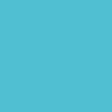

In [25]:
dataset = EzRecordDataset(data_file, index_file, fmt)
print("Length:", len(dataset))
image, target = dataset[42]
print(target)
image